<a href="https://colab.research.google.com/github/desaivaibhav95/Machine-Learning-Classification-and-Regression-/blob/master/Give_me_some_credit(Credit_card_delinquency).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data into the terminal

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Kaggle Datasets /Give me some credit/cs-training.csv")

In [ ]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Data Cleaning

In [ ]:
data.shape

(150000, 11)

In [ ]:
data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
data.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


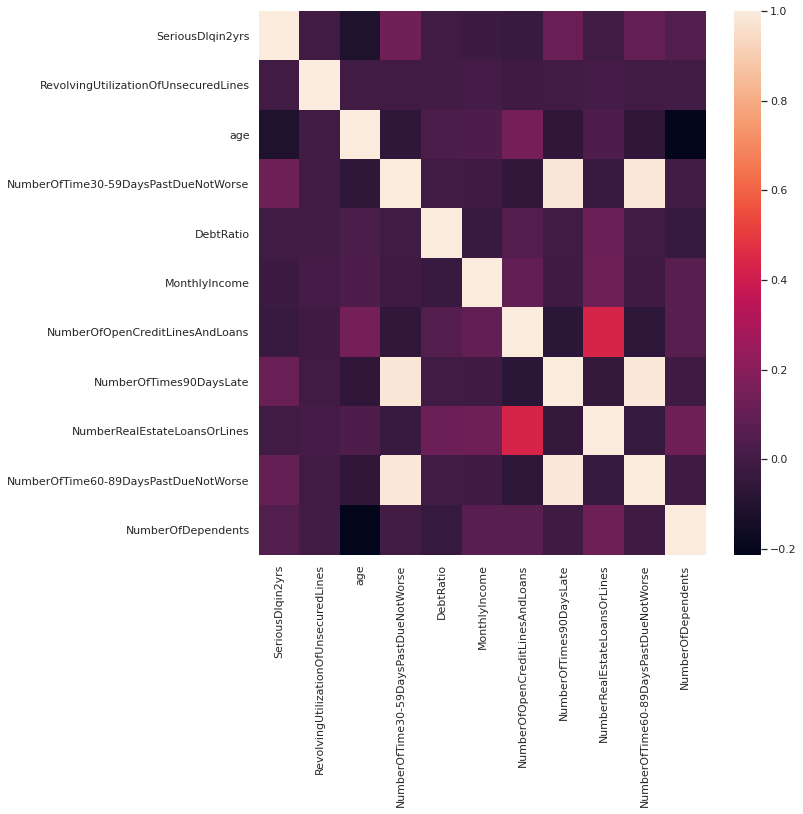

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(method = 'pearson'))

In [ ]:
data.dropna(inplace = True)

In [ ]:
split = np.random.rand(len(data)) < 0.8
train = data[split]
test = data[~split]

In [ ]:
train['SeriousDlqin2yrs'].value_counts()

0    89673
1     6654
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
test['SeriousDlqin2yrs'].value_counts()

0    22239
1     1703
Name: SeriousDlqin2yrs, dtype: int64

## Data Wrangling and Exploratory Data Analysis(EDA)

### Target

In [ ]:
target_0 = train.loc[train['SeriousDlqin2yrs'] == 0]
target_1 = train.loc[train['SeriousDlqin2yrs'] == 1]

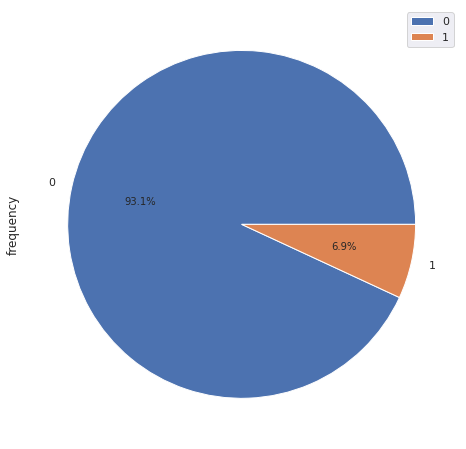

In [ ]:
pd.DataFrame({'frequency': [target_0['SeriousDlqin2yrs'].count(), target_1['SeriousDlqin2yrs'].count()],
              'index' : ['0','1']}).plot.pie(y = 'frequency', figsize = (8,8), autopct='%1.1f%%')

### Debt Ratio

In [ ]:
train['DebtRatio'].describe()

count    96327.000000
mean        26.486172
std        443.372506
min          0.000000
25%          0.143218
50%          0.296487
75%          0.482556
max      61106.500000
Name: DebtRatio, dtype: float64

In [ ]:
for a in [0.99]:
  print("{:.2f}".format(train['DebtRatio'].quantile(a)))

645.00


In [ ]:
train.drop(train[train['DebtRatio'] > 2].index, inplace = True)
test.drop(test[test['DebtRatio'] > 2].index, inplace = True)

In [ ]:
train['DebtRatio'].replace({0.0 : train['DebtRatio'].mean()}, inplace = True)
test['DebtRatio'].replace({0.0 : test['DebtRatio'].mean()}, inplace = True)

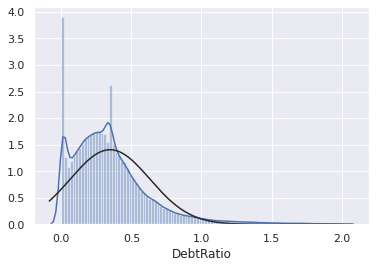

In [ ]:
from scipy.stats import norm
sns.distplot(train['DebtRatio'], fit = norm, bins = 100)
sns.set(rc = {'figure.figsize':(10,8)})

In [ ]:
train['DebtRatio'].describe()

count    93711.000000
mean         0.347534
std          0.284036
min          0.000039
25%          0.152712
50%          0.300869
75%          0.462656
max          2.000000
Name: DebtRatio, dtype: float64

### Monthly Income

In [ ]:
train['MonthlyIncome'].describe()

count    9.371100e+04
mean     6.811078e+03
std      1.447301e+04
min      0.000000e+00
25%      3.500000e+03
50%      5.500000e+03
75%      8.333000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [ ]:
train.drop(train[train['MonthlyIncome'] < 500].index, inplace = True)
test.drop(test[test['MonthlyIncome'] < 500].index, inplace = True)

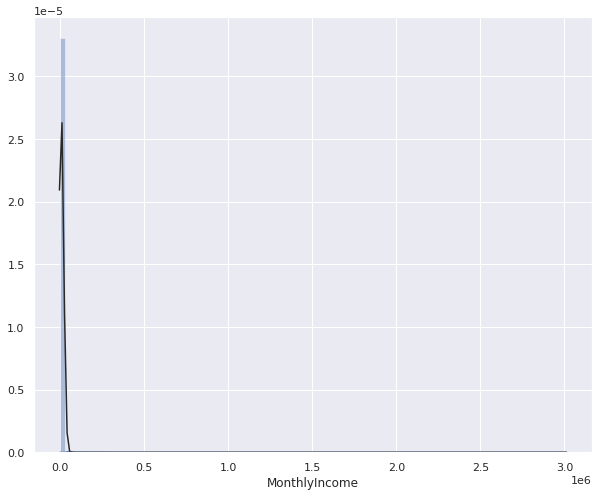

In [ ]:
from scipy.stats import norm
sns.distplot(train['MonthlyIncome'], fit = norm, bins = 100)
sns.set(rc = {'figure.figsize':(10,8)})

### Revolving utilization of unsecured lines

In [ ]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    93378.000000
mean         5.283880
std        208.431446
min          0.000000
25%          0.035423
50%          0.177494
75%          0.576930
max      29110.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### There are some entries in the 'Revolving utiizationofunsecuredlines' column that are large values. However, it seems that these aren't random values and might just be from a different source and so were assembled with the data without normalizing.

#### Hence, rather than replacing these values with a mean or some other metric. Let's just simply normalize them by scaling them down within the limits of the metric, i.e. 0-1.

In [ ]:
for a in train['RevolvingUtilizationOfUnsecuredLines']:
  if a > 1:
    train['RevolvingUtilizationOfUnsecuredLines'].replace({a:a/100000}, inplace = True)

In [ ]:
for a in test['RevolvingUtilizationOfUnsecuredLines']:
  if a > 1:
    test['RevolvingUtilizationOfUnsecuredLines'].replace({a:a/100000}, inplace = True)

In [ ]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    93378.000000
mean         0.306601
std          0.334183
min          0.000000
25%          0.029455
50%          0.155989
75%          0.524529
max          1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [ ]:
train.loc[train['RevolvingUtilizationOfUnsecuredLines'] == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
35,0,0.0,64,0,0.073539,11000.0,9,0,1,0,0.0
127,0,0.0,59,0,0.218854,19167.0,13,0,2,0,0.0
129,0,0.0,59,0,0.351700,4500.0,12,0,1,0,0.0
132,0,0.0,48,0,0.517469,4550.0,7,0,2,0,0.0
150,0,0.0,48,2,0.370876,3000.0,14,0,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
149902,0,0.0,80,0,0.340297,1600.0,1,0,0,0,0.0
149926,0,0.0,70,0,0.129249,5500.0,14,0,1,0,1.0
149930,0,0.0,70,0,0.253990,3633.0,12,0,1,0,0.0
149933,0,0.0,56,0,0.494101,5000.0,8,0,1,0,0.0


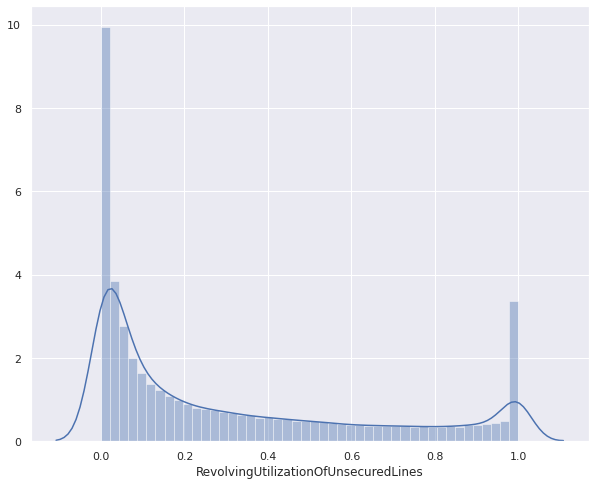

In [ ]:
sns.distplot(train['RevolvingUtilizationOfUnsecuredLines'])
sns.set(rc = {'figure.figsize':(8,5)})

In [ ]:
train.shape

(93378, 11)

### EDA (Summarization of some important features w.r.t the target)

Text(0, 0.5, 'Avg. Monthly Income')

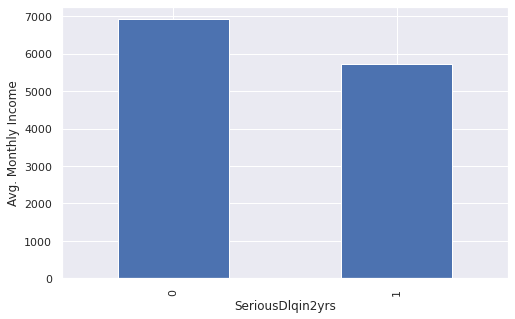

In [ ]:
train.groupby(['SeriousDlqin2yrs'])['MonthlyIncome'].mean().plot(kind = 'bar', figsize = (8,5))
plt.ylabel('Avg. Monthly Income')

Text(0, 0.5, 'Avg.(Monthly liabilities/ Monthly Income)')

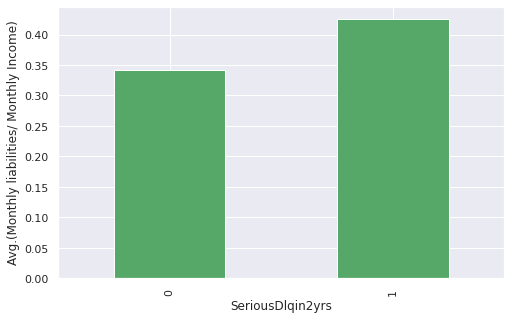

In [ ]:
train.groupby(['SeriousDlqin2yrs'])['DebtRatio'].mean().plot(kind = 'bar', color = 'g', figsize = (8,5))
plt.ylabel('Avg.(Monthly liabilities/ Monthly Income)')

In [ ]:
train.groupby(['SeriousDlqin2yrs'])['NumberOfOpenCreditLinesAndLoans'].agg(['mean', 'median'])

,mean,median
SeriousDlqin2yrs,,
0,8.832014,8
1,8.185842,7


In [ ]:
delinq_2_month_target_0 = train.loc[(train['SeriousDlqin2yrs'] == 0) & (train['NumberOfTime30-59DaysPastDueNotWorse'] != 0)]
delinq_2_month_target_1 = train.loc[(train['SeriousDlqin2yrs'] == 1) & (train['NumberOfTime30-59DaysPastDueNotWorse'] != 0)]

In [ ]:
delinq_2_month_target_0['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

1     9017
2     2264
3      788
4      281
5      125
6       45
98      40
7       19
8       15
9        5
12       1
10       1
96       1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
delinq_2_month_target_1['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

1     1545
2      822
3      419
4      210
5       96
98      62
6       49
7       21
8        6
96       3
9        2
10       2
13       1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
delinq_3_month_target_0 = train.loc[(train['SeriousDlqin2yrs'] == 0) & (train['NumberOfTime60-89DaysPastDueNotWorse'] != 0)]
delinq_3_month_target_1 = train.loc[(train['SeriousDlqin2yrs'] == 1) & (train['NumberOfTime60-89DaysPastDueNotWorse'] != 0)]

In [ ]:
delinq_3_month_target_0['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

1     2615
2      350
3       97
98      40
4       30
5        8
6        4
7        3
96       1
8        1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
delinq_3_month_target_1['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

1     1124
2      350
3      121
98      62
4       43
5       13
6        9
96       3
8        1
7        1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
target_0['NumberOfDependents'].value_counts()

0.0     49322
1.0     18079
2.0     13327
3.0      6341
4.0      1920
5.0       516
6.0       105
7.0        37
8.0        17
10.0        4
9.0         3
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [ ]:
target_1['NumberOfDependents'].value_counts()

0.0    3142
1.0    1420
2.0    1168
3.0     637
4.0     218
5.0      48
6.0      15
7.0       5
8.0       1
Name: NumberOfDependents, dtype: int64

In [ ]:
target_0_loans = target_0.loc[:,['SeriousDlqin2yrs','NumberOfOpenCreditLinesAndLoans']]
target_1_loans = target_1.loc[:,['SeriousDlqin2yrs','NumberOfOpenCreditLinesAndLoans']]

Text(0, 0.5, 'No. of people(target 0)')

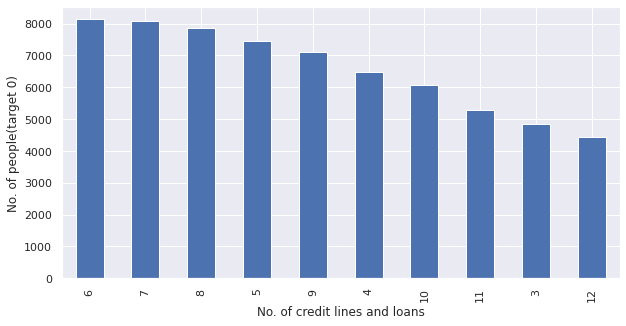

In [ ]:
target_0_loans['NumberOfOpenCreditLinesAndLoans'].value_counts().head(10).plot(kind = 'bar', figsize = (10,5))
plt.xlabel('No. of credit lines and loans')
plt.ylabel('No. of people(target 0)')

Text(0, 0.5, 'No. of people(target 1)')

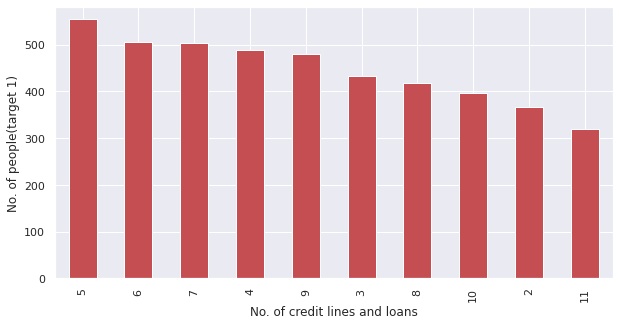

In [ ]:
target_1_loans['NumberOfOpenCreditLinesAndLoans'].value_counts().head(10).plot(kind = 'bar', figsize = (10,5), color = 'r')
plt.xlabel('No. of credit lines and loans')
plt.ylabel('No. of people(target 1)')

In [ ]:
target_0_real_estate_loans = target_0.loc[:,['SeriousDlqin2yrs','NumberRealEstateLoansOrLines']]

In [ ]:
target_1_real_estate_loans = target_1.loc[:,['SeriousDlqin2yrs','NumberRealEstateLoansOrLines']]

Text(0, 0.5, 'No. of people(target 0)')

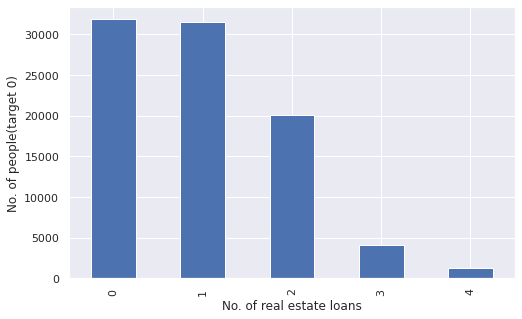

In [ ]:
target_0_real_estate_loans['NumberRealEstateLoansOrLines'].value_counts().head().plot(kind = 'bar', figsize = (8,5))
plt.xlabel('No. of real estate loans')
plt.ylabel('No. of people(target 0)')

Text(0, 0.5, 'No. of people (target 1)')

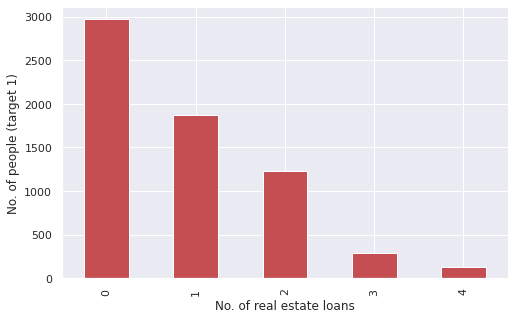

In [ ]:
target_1_real_estate_loans['NumberRealEstateLoansOrLines'].value_counts().head().plot(kind = 'bar', color = 'r', figsize = (8,5))
plt.xlabel('No. of real estate loans')
plt.ylabel('No. of people (target 1)')

In [ ]:
target_1.loc[target_1['RevolvingUtilizationOfUnsecuredLines'] > 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
162,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
251,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
667,1,1.248751,33,0,0.175120,2700.0,3,2,0,0,0.0
697,1,2066.000000,58,0,0.271121,6000.0,8,1,1,0,1.0
793,1,1.257485,26,0,0.129805,1794.0,1,2,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148828,1,73.846154,53,2,0.513355,7000.0,5,8,2,0,4.0
149069,1,1.027421,42,0,0.213957,5000.0,3,4,0,0,1.0
149168,1,1.034183,51,1,0.251655,12083.0,3,0,1,1,1.0
149223,1,1.007421,38,1,1.781955,664.0,8,3,0,0,2.0


In [ ]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [ ]:
train['TotalNumberOfLoansandCreditLines'] = train['NumberOfOpenCreditLinesAndLoans'] + train['NumberRealEstateLoansOrLines']
train.drop(columns = ['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines'], inplace = True)

In [ ]:
test['TotalNumberOfLoansandCreditLines'] = test['NumberOfOpenCreditLinesAndLoans'] + test['NumberRealEstateLoansOrLines']
test.drop(columns = ['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines'], inplace = True)

In [ ]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TotalNumberOfLoansandCreditLines
0,1,0.766127,45,2,0.802982,9120.0,0,0,2.0,19
2,0,0.658180,38,1,0.085113,3042.0,1,0,0.0,2
3,0,0.233810,30,0,0.036050,3300.0,0,0,0.0,5
4,0,0.907239,49,1,0.024926,63588.0,0,0,0.0,8
5,0,0.213179,74,0,0.375607,3500.0,0,0,1.0,4


In [ ]:
train_y = train['SeriousDlqin2yrs']
train.drop(columns = ['SeriousDlqin2yrs'], inplace=True)

In [ ]:
test_y = test['SeriousDlqin2yrs']
test.drop(columns = ['SeriousDlqin2yrs'], inplace=True)

In [ ]:
train['Number_of_times_upto_90days_late'] = train['NumberOfTime30-59DaysPastDueNotWorse'] + train['NumberOfTime60-89DaysPastDueNotWorse']
train.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace = True)

In [ ]:
test['Number_of_times_upto_90days_late'] = test['NumberOfTime30-59DaysPastDueNotWorse'] + test['NumberOfTime60-89DaysPastDueNotWorse']
test.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace = True)

In [ ]:
train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfDependents,TotalNumberOfLoansandCreditLines,Number_of_times_upto_90days_late
0,0.766127,45,0.802982,9120.0,0,2.0,19,2
2,0.658180,38,0.085113,3042.0,1,0.0,2,1
3,0.233810,30,0.036050,3300.0,0,0.0,5,0
4,0.907239,49,0.024926,63588.0,0,0.0,8,1
5,0.213179,74,0.375607,3500.0,0,1.0,4,0


## Data Normalization and Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfDependents,TotalNumberOfLoansandCreditLines,Number_of_times_upto_90days_late
0,0.766127,45,0.802982,9120.0,0,2.0,19,2
2,0.658180,38,0.085113,3042.0,1,0.0,2,1
3,0.233810,30,0.036050,3300.0,0,0.0,5,0
4,0.907239,49,0.024926,63588.0,0,0.0,8,1
5,0.213179,74,0.375607,3500.0,0,1.0,4,0


#### Standard Scaling of continuous features

In [ ]:
train_cont_cols = train.loc[:,['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio']]
test_cont_cols = test.loc[:,['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio']]

ss = StandardScaler()
ss_cols_train = pd.DataFrame(ss.fit_transform(train_cont_cols))
ss_cols_test = pd.DataFrame(ss.fit_transform(test_cont_cols))

In [ ]:
ss_cols_train.columns = ['Revolving_Utilization_Of_Unsecured_Lines', 'Monthly_Income', 'Debt_Ratio']
ss_cols_test.columns = ['Revolving_Utilization_Of_Unsecured_Lines', 'Monthly_Income', 'Debt_Ratio']

In [ ]:
train.drop(columns = ['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio'], inplace = True)

In [ ]:
test.drop(columns = ['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio'], inplace = True)

#### Label Encoding and One Hot Encdoing of Categorical columns

In [ ]:
le = LabelEncoder()

train['NumberOfTimes90DaysLate'] = le.fit_transform(train['NumberOfTimes90DaysLate'])
train['NumberOfDependents'] = le.fit_transform(train['NumberOfDependents'])
train['TotalNumberOfLoansandCreditLines'] = le.fit_transform(train['TotalNumberOfLoansandCreditLines'])
train['Number_of_times_upto_90days_late'] = le.fit_transform(train['Number_of_times_upto_90days_late'])

test['NumberOfTimes90DaysLate'] = le.fit_transform(test['NumberOfTimes90DaysLate'])
test['NumberOfDependents'] = le.fit_transform(test['NumberOfDependents'])
test['TotalNumberOfLoansandCreditLines'] = le.fit_transform(test['TotalNumberOfLoansandCreditLines'])
test['Number_of_times_upto_90days_late'] = le.fit_transform(test['Number_of_times_upto_90days_late'])

In [ ]:
ss_cols_train.tail()

,Revolving_Utilization_Of_Unsecured_Lines,Monthly_Income,Debt_Ratio
93373,2.074921,-0.414998,-0.023476
93374,0.236822,-0.236984,0.202784
93375,-0.795759,-0.326681,-0.430651
93376,-0.020516,-0.086294,1.306826
93377,-0.917471,-0.077186,-0.023476


In [ ]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)

In [ ]:
train.drop(columns = ['index'], inplace = True)
test.drop(columns = ['index'], inplace = True)

In [ ]:
train_final = pd.concat(objs = [train,ss_cols_train], axis = 1)
test_final = pd.concat(objs = [test, ss_cols_test], axis = 1)

## Model Building and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
random_state = np.random.RandomState(0)

### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 200, random_state = random_state)
model_lr = lr.fit(train_final,train_y)

In [ ]:
pred_lr = model_lr.predict(test_final)

In [ ]:
prob_lr = model_lr.predict_proba(test_final)

In [ ]:
print("Accuracy(LR) : {:.2f}".format(accuracy_score(test_y,pred_lr)))

Accuracy(LR) : 0.93


In [ ]:
confusion_matrix(test_y,pred_lr)

array([[21396,   124],
       [ 1440,   212]])

In [ ]:
print(classification_report(test_y,pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21520
           1       0.63      0.13      0.21      1652

    accuracy                           0.93     23172
   macro avg       0.78      0.56      0.59     23172
weighted avg       0.92      0.93      0.91     23172



In [ ]:
print("ROC AUC Score : {:.2f}".format(roc_auc_score(test_y,pred_lr)))

ROC AUC Score : 0.56


### Decision Trees

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5, max_features=5, random_state = random_state)
model_dtc = dtc.fit(train_final,train_y)

In [ ]:
pred_dtc = model_dtc.predict(test_final)

In [ ]:
print("Accuracy score(DTC) : {:.2f}".format(accuracy_score(test_y,pred_dtc)))

Accuracy score(DTC) : 0.93


In [ ]:
confusion_matrix(test_y,pred_dtc)

array([[21359,   161],
       [ 1423,   229]])

In [ ]:
print(classification_report(test_y,pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21520
           1       0.59      0.14      0.22      1652

    accuracy                           0.93     23172
   macro avg       0.76      0.57      0.59     23172
weighted avg       0.91      0.93      0.91     23172



In [ ]:
print("ROC AUC score : {:.2f}".format(roc_auc_score(test_y,pred_dtc)))

ROC AUC score : 0.57


### Random Forest Classifier

In [ ]:
train_final.shape

(93378, 8)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_features= 8, max_depth = 8, random_state = random_state)
model_rfc = rfc.fit(train_final,train_y)

In [ ]:
pred_rfc = model_rfc.predict(test_final)

In [ ]:
print("Accuracy(RFC) : {:.2f}".format(accuracy_score(test_y,pred_rfc)))

Accuracy(RFC) : 0.93


In [ ]:
confusion_matrix(test_y,pred_rfc)

array([[21332,   188],
       [ 1373,   279]])

In [ ]:
print(classification_report(test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21520
           1       0.60      0.17      0.26      1652

    accuracy                           0.93     23172
   macro avg       0.77      0.58      0.61     23172
weighted avg       0.92      0.93      0.91     23172



In [ ]:
print("ROC AUC score : {:.2f}".format(roc_auc_score(test_y,pred_rfc)))

ROC AUC score : 0.58


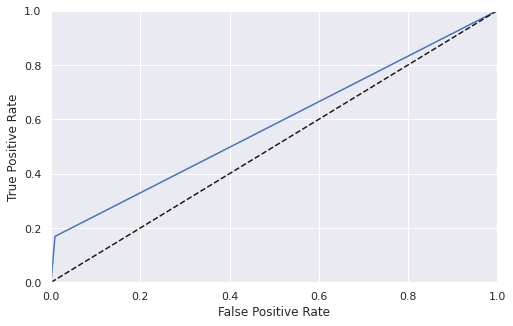

In [ ]:
fpr,tpr,thresholds = roc_curve(test_y,pred_rfc)

def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, label = label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)  
plt.show()